<a href="https://colab.research.google.com/github/Mgobeaalcoba/Exploration_Data_Analyst/blob/main/15_16_An%C3%A1lisis_multivariable_empleando_el_dataset_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción

*Análisis multivariable: análisis de tres o mas variables*

# Análisis multivariable

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load Data set 

In [42]:
url='https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/train_titanic.csv'

In [43]:
titanic_data_set = pd.read_csv(url,error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
titanic_data_set.shape

(891, 12)

In [45]:
titanic_data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
#missing data 
total = titanic_data_set.isnull().sum().sort_values(ascending=False)
# con .isnull().sum() le digo que me sume la cantidad de valores nulos de cada columna
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [47]:
#porcentaje de mujeres supervivientes
#percentage of women survived
women = titanic_data_set.loc[titanic_data_set["Sex"] == 'female']["Survived"] # Sintaxis de .loc para filtrar filas
rate_women = sum(women)/len(women)
women

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

In [48]:
rate_women

0.7420382165605095

In [49]:
#porcentajes de hombres 
men = titanic_data_set.loc[titanic_data_set.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
men

0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64

In [50]:
rate_men

0.18890814558058924

In [51]:
# Opción 1 - La mía

my_dict = {
    0 : "not_survided",
    1 : "survived"
}

titanic_data_set['Survived_cat'] = titanic_data_set['Survived'].map(my_dict)  # Mapeo o convierto a traves de un diccionario una variable numerica en categórica. 

titanic_data_set.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cat
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,not_survided
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C,survived
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S,not_survided
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S,not_survided
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,survived
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S,survived
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S,survived
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C,not_survided
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,not_survided
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S,not_survided


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


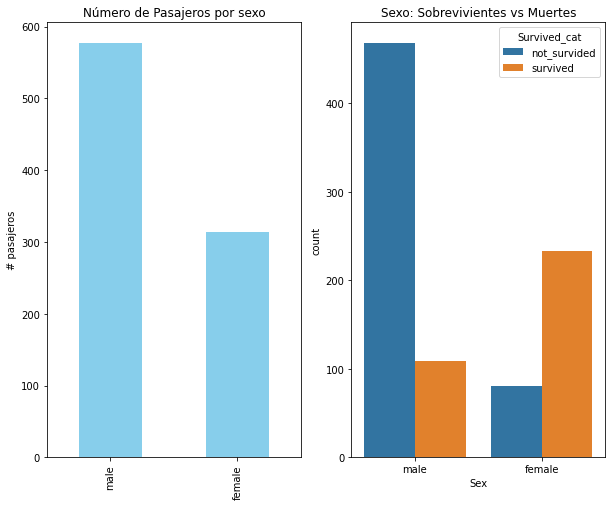

In [53]:
#Graficación 
fig, ax = plt.subplots(1, 2, figsize = (10, 8)) # Mis subplots estarán organizados en 1 fila, 2 columnas -> los dos primeros argumentos
titanic_data_set["Sex"].value_counts().plot.bar(color = "skyblue", ax =
ax[0])
ax[0].set_title("Número de Pasajeros por sexo")
ax[0].set_ylabel("# pasajeros")
sns.countplot("Sex", hue = "Survived_cat", data = titanic_data_set, ax = ax[1]) # Cuenta separada por categoria. Para eso sirv el countplot
ax[1].set_title("Sexo: Sobrevivientes vs Muertes")
plt.show()

In [ ]:
############# FIN DE LA CLASE #######################

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


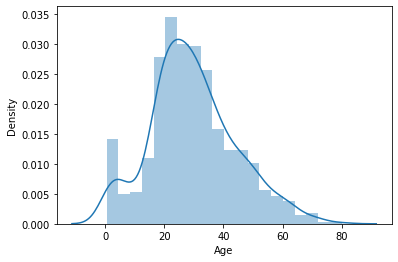

In [57]:
#distribución de la edad 
sns.distplot(titanic_data_set['Age'].dropna()) # Con el dropna() sobre el dataset elimino de mi grafica los valores nulos

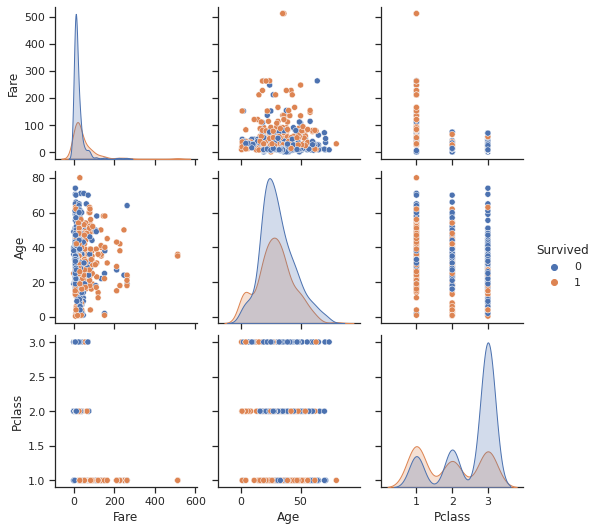

In [58]:
sns.set(style="ticks", color_codes=True) # Seteo el tipo de gráficas que quiero contruir con seaborn 
sns.pairplot(titanic_data_set,vars = [ 'Fare','Age','Pclass'],
hue="Survived")
plt.show()

In [59]:
titanic_data_set['Embarked'] = titanic_data_set['Embarked'].map({"S":1,
"C":2,"Q":2,"NaN":0})
Tcorrelation = titanic_data_set.corr(method='pearson') # Busco la correlación con el esquema de pearson que va -1 a 1. Por default usa el esquema de 0 a 1
Tcorrelation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.022269
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.151777
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.076466
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.025431
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.069438
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.061512
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.163758
Embarked,-0.022269,0.151777,-0.076466,0.025431,-0.069438,-0.061512,0.163758,1.000000


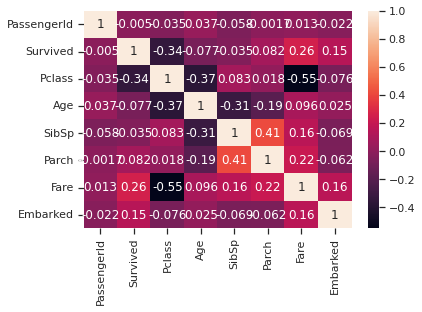

In [62]:
sns.heatmap(Tcorrelation,xticklabels=Tcorrelation.columns,
 yticklabels=Tcorrelation.columns,annot=True)
# No me muestra correlación con sexo porque sexo es categórica. Debería convertirla o mapearla previamente a una variable numérica

In [64]:
titanic_data_set['Sex'].unique()

array(['male', 'female'], dtype=object)

In [65]:
titanic_data_set['Sex_num'] = titanic_data_set['Sex'].map({
    "male" : 1,
    "female" : 0
})

titanic_data_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cat,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1.0,not_survided,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0,survived,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,survived,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.0,survived,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1.0,not_survided,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,1.0,not_survided,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,1.0,survived,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,1.0,not_survided,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,2.0,survived,1


In [71]:
Tcorrelation = titanic_data_set.corr(method="spearman") # Busco la correlación con el esquema de pearson que va -1 a 1. Por default usa el esquema de 0 a 1
Tcorrelation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_num
PassengerId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975,-0.022229,0.042939
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736,0.151777,-0.543351
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032,-0.050948,0.135775
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051,0.010495,0.083330
SibSp,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113,-0.019095,-0.195204
Parch,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074,-0.043031,-0.254512
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000,0.034455,-0.259593
Embarked,-0.022229,0.151777,-0.050948,0.010495,-0.019095,-0.043031,0.034455,1.000000,-0.121405
Sex_num,0.042939,-0.543351,0.135775,0.083330,-0.195204,-0.254512,-0.259593,-0.121405,1.000000


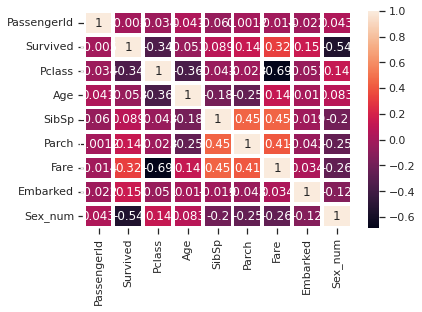

In [82]:
sns.heatmap(Tcorrelation, annot=True, linewidths=3 )